# Chapter 04

필기체를 분류하는 CNN

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2441 - accuracy: 0.9263 - val_loss: 0.0669 - val_accuracy: 0.9811
Epoch 2/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0849 - accuracy: 0.9747 - val_loss: 0.0477 - val_accuracy: 0.9862
Epoch 3/10
48000/48000 [==============================] - 58s 1ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 4/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 5/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0463 - val_accuracy: 0.9879
Epoch 6/10
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0475 - accuracy: 0.9862 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 7/10
48000/48000 [==============================] - 64s 1ms/st

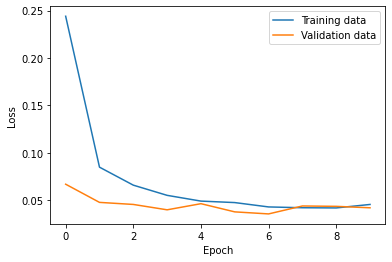

KeyError: 'acc'

In [21]:
# 분류 CNN 모델링
import keras
from keras import models, layers
from keras import backend

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])


# 분류 CNN을 위한 데이터 준비  
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test


# 학습 효과 분석
import numpy as np
import matplotlib.pyplot as plt
import os

def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()            
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()     


# 분류 CNN 학습 및 테스트
def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

if __name__ == '__main__':
    main()

컬러 이미지를 분류하는 CNN 

In [22]:
# sfile.py

import datetime
import uuid
import os


def unique_filename(type='uuid'):
    if type == 'datetime':
        filename = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    else:  # type == "uuid"
        filename = str(uuid.uuid4())
    return filename


def makenewfold(prefix='output_', type='datetime'):
    suffix = unique_filename('datetime')
    foldname = 'output_' + suffix
    os.makedirs(foldname)
    return foldname

In [25]:
# 분류 CNN 패키지 임포트
from sklearn import model_selection,metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as plt
import os
from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input,Conv2D, MaxPooling2D,Flatten, Dense, Dropout


# 분류 CNN 모델링
class CNN(Model):
    def __init__(model,nb_classes, in_shape = None):
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x,model.y)
        model.compile()
    
    def build_model(model):
        nb_classes= model.nb_classes
        in_shape = model.in_shape
        
        x = Input(in_shape)
        
        h = Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = in_shape)(x)
        h = Conv2D(64,(3,3), activation='relu')(h)
        h = MaxPolling2D(pool_size=(2,2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h
        
        h = Dense(128,activation='relu')(h)
        h = Dropout(0.5)(h)
        z_fl = h
        
        y = Dense(nb_classe,activation='softmax', name='preds')(h)
        
        model.cl_part = Model(x,z_cl)
        model.fl_part = Model(x,z_fl)
        model.x, model.y = x,y
        
    def compile(model):
        Model.compile(model, loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
        
# 분류 CNN을 위한 데이터 준비
class DataSet:
    def __init__(self,X,y,nb_classes, scaling=True, test_size =0.2, random_state =0):
        self.X = X    # X는 originally 벡터
        self.add_channels()
        
        x = self.X
        X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2, random_state = random_state)
        print(X_train.shape, y_train,shape)
        
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if scaling:
            # 각각의 픽셀의 특징에 대해 (0,1) scaling
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(X_train.reshape(n,-1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.fit_transform(X_test.reshape(n,-1)).reshape(X_test.shape)
        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')
        
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, nb_classes)
        
    def add_channels(self):
        X = self.X
        
        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape
            
            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1,img_rows,img_cols)
                
            else:
                X = X.reshape(X.shape[0], img_rows,img_cols,1)
                input_shape = (img_rows,img_cols, 1)
                
        else : 
            input_shape = X.shape[1:]
            
        self.X = X
        self.input_shape = input_shape
        

# 분류 CNN 학습 및 성능 평가를 위한 머신 클래스 
class Machine():
    def __init__(self,X,y,nb_classes = 2, fig = True):
        self.nb_classes = nb_classes
        self.set_data(X,y)
        self.set_model()
        self.fig = fig
        
    def set_data(self,X,y):
        nb_classes = self.nb_classes
        self.data= DataSet(X,y, nb_classes)
        print('data.input_shape',self.data.input_shape)
        
    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model =CNN(nb_classes=self.nb_classes, in_shape = data.input_shape)
        
    def fit(self, epochs =10, batch_size = 128, verbose=1):
        data = self.data
        model = self.model
        
        history = model.fit(data.X_train, data.Y_train, batch_size = batch_size, epochs = epochs, verbose = verbose, 
                            validation_data = (data.X_test, data.Y_test) )
        
        return history
    
    def run(self, epochs =100, batch_size = 128, verbose = 1):
        data = self.data
        model = self.model
        fig = self.fig
        
        history = self.fit(epochs = epochs , batch_size=batch_size, verbose = verbose)
        score = model.evaluate(data.X_test, data.Y_test, verbose = verbose)
        
        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred,axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))
        
        print('Test score:', score[0])
        print('Test accuracy', score[1])
        
        # 결과 저장
        suffix = unique_filename('datatime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        save_history_history('history_history.npy', history. history, fold = foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.h5'))
        print('output results are saved in', foldname)
        
        if fig:
            plt.figure(figsize=(12,4))
            plt.subplot(1,2,1)
            plot_acc(history)
            plt.subplot(1,2,2)
            plot_loss(history)
            plt.show()
            
        self.history = history
        
        return foldname